In [1]:
# !./batch_download.sh -f pdblist -p -o compressed_pdbs

# Import modules

In [6]:
import os
import pandas as pd

# List all files including PDBs

In [7]:
allfiles = os.listdir('./')

In [8]:
realpdbs = []
for file in os.listdir("./"):
    if file.endswith(".pdb"):
        realpdbs.append(file)

In [9]:
print("All files:", len(allfiles), "\nPDB files:", len(realpdbs))

All files: 459 
PDB files: 446


# Import Biopython PDB parser

In [10]:
from Bio.PDB.PDBParser import PDBParser

In [11]:
parser = PDBParser(PERMISSIVE=1)

# Single file

In [12]:
structure_id = "1AQ1"
filename = "1AQ1.pdb"
structure = parser.get_structure(structure_id, filename)

In [13]:
resolution = structure.header["resolution"]

In [14]:
structure.header["name"]

'human cyclin dependent kinase 2 complexed with the inhibitor staurosporine'

# All pdb files for CDK2

## CDK2 file name list

In [15]:
cdk2_list = []

for i in realpdbs:
    filename = i
    structure_id = i.strip(".pdb")
    structure = parser.get_structure(structure_id, filename)
    cdk2_list.append(structure.header["name"])

In [16]:
len(cdk2_list)

446

## CDK2 PDB files resolution

In [17]:
resolution = []

for i in realpdbs:
    filename = i
    structure_id = i.strip(".pdb")
    structure = parser.get_structure(structure_id, filename)
    resolution.append(structure.header["resolution"])

In [18]:
len(resolution)

446

## Extract Publish year

### single file

In [19]:
structure_id = "1AQ1"
filename = "1AQ1.pdb"

with open(filename) as f:
    first_line = f.readline()

In [20]:
first_line

'HEADER    PROTEIN KINASE                          05-AUG-97   1AQ1              \n'

In [21]:
publish_date_single = first_line.split()[-2]
print(publish_date_single[-2:])

97


### Publish Date for CDK2 PDb files

In [39]:
publish_date = []

for i in realpdbs:
    with open(i) as f:
        first_line = f.readline()
        release_date = first_line.split()[-2]
        publish_date.append(release_date[-2:])

In [40]:
publish_date

['97',
 '98',
 '98',
 '98',
 '98',
 '99',
 '99',
 '00',
 '00',
 '00',
 '00',
 '96',
 '00',
 '00',
 '00',
 '00',
 '01',
 '01',
 '01',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '96',
 '96',
 '96',
 '96',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '99',
 '03',
 '03',
 '03',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '05',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '06',
 '07',
 '07',
 '07',
 '07',
 '07',
 '07',
 '07',
 '07',
 '07',
 '07',
 '07',
 '07',
 '07',
 '07',
 '07',
 '07',
 '07',

In [41]:
for i in range(len(publish_date)):
    year = publish_date[i]
    if int(year) > 90:
        year = int("19"+year)
    else:
        year = int("20"+year)
    publish_date[i] = year
    print(year)

1997
1998
1998
1998
1998
1999
1999
2000
2000
2000
2000
1996
2000
2000
2000
2000
2001
2001
2001
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
1996
1996
1996
1996
2001
2001
2001
2001
2001
2001
2001
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
1999
2003
2003
2003
2004
2004
2004
2004
2004
2004
2004
2004
2004
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2006
2006
2006
2006
2006
2006
2005
2006
2006
2006
2006
2006
2006
2006
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2009
2009
2009
2009
2009
2009
2009
2009
2009
2009
2010
2010
2007
2007
2007
2008
2008
2008
2008
2008
2008
2008
2008
2008
2009
2009
2009
2010
2010
2010
2010


In [73]:
publish_date

[1997,
 1998,
 1998,
 1998,
 1998,
 1999,
 1999,
 2000,
 2000,
 2000,
 2000,
 1996,
 2000,
 2000,
 2000,
 2000,
 2001,
 2001,
 2001,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 1996,
 1996,
 1996,
 1996,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 2003,
 1999,
 2003,
 2003,
 2003,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2004,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2005,
 2006,
 2006,
 2006,
 2006,
 2006,
 2006,
 2005,
 2006,
 2006,
 2006,
 2006,
 2006,
 2006,
 2006,
 2007,
 2007,
 2007,
 2007,
 2007,
 2007,
 2007,
 2007,
 2007,
 2007,
 2007,
 2007,
 2007,
 2007,
 2007,
 2007,
 2007,

# Extract chains

In [44]:
from Bio import *

In [45]:
from __future__ import print_function

In [46]:
def add_values_in_dict(sample_dict, key, list_of_values):
    ''' Append multiple values to a key in 
        the given dictionary '''
    if key not in sample_dict:
        sample_dict[key] = list()
    sample_dict[key].extend(list_of_values)
    return sample_dict

In [47]:
import warnings
from pathlib import Path
from Bio.PDB.PDBExceptions import PDBConstructionWarning
from Bio.PDB import PDBParser

# To get rid of those annoying warnings like 'WARNING: Chain B is discontinuous at line 4059.'
warnings.simplefilter('ignore', PDBConstructionWarning)

parser = PDBParser()

chainDict = dict()

if __name__ == "__main__":
    for pdb_filename in realpdbs:
        with open(pdb_filename, "rt") as file_handle:
            structure = parser.get_structure("?", file_handle)
        # you could of course parse the pdb code from the file name as well. 
        # But I found this to be easier implemented.       
        pdb_code = structure.header.get("idcode")
#         resolution = structure.header.get("resolution")

        for chain in structure.get_chains():
            chainId = []
            chainId.append(chain.id)
            chainDict = add_values_in_dict(chainDict, pdb_code, chainId)

In [48]:
len(chainDict)

446

In [50]:
chain_df = pd.DataFrame(pd.Series(chainDict).reset_index()).set_axis(["id", "chain_list"], axis='columns')

In [51]:
chain_df

,id,chain_list
0,1AQ1,[A]
1,1B38,[A]
2,1B39,[A]
3,1BUH,"[A, B]"
4,1CKP,[A]
...,...,...
441,7ZPC,[A]
442,8B54,"[A, B, C, D]"
443,8CUR,[A]
444,8H6P,"[A, B]"


In [52]:
chain_df.shape

(446, 2)

# Digest to make Dataframe

In [74]:
digest = {'File': realpdbs,
        'Title': cdk2_list,
         'Resolution': resolution,
          'Year': publish_date,
         }

In [75]:
# set pandas option to dsplay all rows
pd.set_option('display.max_rows', None)

## Create Dataframe

In [76]:
head_df = pd.DataFrame(digest)

In [77]:
head_df

,File,Title,Resolution,Year
0,1AQ1.pdb,human cyclin dependent kinase 2 complexed with...,2.00,1997
1,1B38.pdb,human cyclin-dependent kinase 2,2.00,1998
2,1B39.pdb,human cyclin-dependent kinase 2 phosphorylated...,2.10,1998
3,1BUH.pdb,crystal structure of the human cdk2 kinase com...,2.60,1998
4,1CKP.pdb,human cyclin dependent kinase 2 complexed with...,2.05,1998
5,1DI8.pdb,the structure of cyclin-dependent kinase 2 (cd...,2.20,1999
6,1DM2.pdb,human cyclin-dependent kinase 2 complexed with...,2.10,1999
7,1E1V.pdb,human cyclin dependent kinase 2 complexed with...,1.95,2000
8,1E1X.pdb,human cyclin dependent kinase 2 complexed with...,1.85,2000
9,1E9H.pdb,thr 160 phosphorylated cdk2 - human cyclin a3 ...,2.50,2000


In [57]:
# check Dataframe dimension
head_df.shape

(446, 4)

In [78]:
pdb_df = head_df.join(chain_df)

In [79]:
pdb_df.shape

(446, 6)

In [82]:
pdb_df

,File,Title,Resolution,Year,id,chain_list
0,1AQ1.pdb,human cyclin dependent kinase 2 complexed with...,2.00,1997,1AQ1,[A]
1,1B38.pdb,human cyclin-dependent kinase 2,2.00,1998,1B38,[A]
2,1B39.pdb,human cyclin-dependent kinase 2 phosphorylated...,2.10,1998,1B39,[A]
3,1BUH.pdb,crystal structure of the human cdk2 kinase com...,2.60,1998,1BUH,"[A, B]"
4,1CKP.pdb,human cyclin dependent kinase 2 complexed with...,2.05,1998,1CKP,[A]
5,1DI8.pdb,the structure of cyclin-dependent kinase 2 (cd...,2.20,1999,1DI8,[A]
6,1DM2.pdb,human cyclin-dependent kinase 2 complexed with...,2.10,1999,1DM2,[A]
7,1E1V.pdb,human cyclin dependent kinase 2 complexed with...,1.95,2000,1E1V,[A]
8,1E1X.pdb,human cyclin dependent kinase 2 complexed with...,1.85,2000,1E1X,[A]
9,1E9H.pdb,thr 160 phosphorylated cdk2 - human cyclin a3 ...,2.50,2000,1E9H,"[A, B, C, D]"


In [85]:
number_of_chains = []

for i in chain_df["chain_list"]:
    number_of_chains.append(len(i))

In [86]:
number_of_chains

[1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 4,
 4,
 4,
 2,
 1,
 4,
 1,
 1,
 1,
 1,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 6,
 1,
 1,
 4,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 4,
 1,
 1,
 1,
 4,
 4,
 6,
 6,
 6,
 6,
 1,
 4,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 6,
 1,
 6,
 1,
 1,
 4,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 4,
 1,
 1,
 4,
 4,
 4,
 6,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 6,
 6,
 4,
 1,
 1,
 1,
 1,
 1,
 4,
 4,
 4,
 4,
 4,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 6,
 4,
 4,
 4,
 4,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 6,
 6,
 6,
 4,
 4,
 5,
 5,
 4,
 4,
 5,
 1,
 1,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [88]:
pdb_df['Number_of_chains'] = number_of_chains

In [89]:
pdb_df

,File,Title,Resolution,Year,id,chain_list,Number_of_chains
0,1AQ1.pdb,human cyclin dependent kinase 2 complexed with...,2.00,1997,1AQ1,[A],1
1,1B38.pdb,human cyclin-dependent kinase 2,2.00,1998,1B38,[A],1
2,1B39.pdb,human cyclin-dependent kinase 2 phosphorylated...,2.10,1998,1B39,[A],1
3,1BUH.pdb,crystal structure of the human cdk2 kinase com...,2.60,1998,1BUH,"[A, B]",2
4,1CKP.pdb,human cyclin dependent kinase 2 complexed with...,2.05,1998,1CKP,[A],1
5,1DI8.pdb,the structure of cyclin-dependent kinase 2 (cd...,2.20,1999,1DI8,[A],1
6,1DM2.pdb,human cyclin-dependent kinase 2 complexed with...,2.10,1999,1DM2,[A],1
7,1E1V.pdb,human cyclin dependent kinase 2 complexed with...,1.95,2000,1E1V,[A],1
8,1E1X.pdb,human cyclin dependent kinase 2 complexed with...,1.85,2000,1E1X,[A],1
9,1E9H.pdb,thr 160 phosphorylated cdk2 - human cyclin a3 ...,2.50,2000,1E9H,"[A, B, C, D]",4


In [ ]:
# chain_df = pd.DataFrame(pd.Series(chainDict).reset_index()).set_axis(["id", "chain_list"], axis='columns')

## Sort Dataframe based on Resolution 

In [60]:
pdb_df_sorted_by_res = pdb_df.sort_values("Resolution")

In [61]:
pdb_df_sorted_by_res

,File,Title,Resolution,Year,id,chain_list
407,6Q4G.pdb,cdk2 in complex with fraglite37,0.98,2018,6Q4G,[A]
408,6Q4H.pdb,cdk2 in complex with fraglite36,1.00,2018,6Q4H,[A]
400,6Q49.pdb,cdk2 in complex with fraglite6,1.00,2018,6Q49,[A]
399,6Q48.pdb,cdk2 in complex with fraglite7,1.03,2018,6Q48,[A]
410,6Q4J.pdb,cdk2 in complex with fraglite34,1.05,2018,6Q4J,[A]
411,6Q4K.pdb,cdk2 in complex with fraglite38,1.06,2018,6Q4K,[A]
405,6Q4E.pdb,cdk2 in complex with fraglite33,1.06,2018,6Q4E,[A]
404,6Q4D.pdb,cdk2 in complex with fraglite31,1.07,2018,6Q4D,[A]
409,6Q4I.pdb,cdk2 in complex with fraglite35,1.11,2018,6Q4I,[A]
396,6Q3B.pdb,cdk2 in complex with fraglite2,1.11,2018,6Q3B,[A]


## Sort Dataframe based on the year

In [62]:
pdb_df_sorted_by_year = pdb_df.sort_values("Year")

In [63]:
pdb_df_sorted_by_year

,File,Title,Resolution,Year,id,chain_list
11,1FIN.pdb,cyclin a-cyclin-dependent kinase 2 complex,2.30,1996,1FIN,"[A, B, C, D]"
39,1JSU.pdb,p27(kip1)/cyclin a/cdk2 complex,2.30,1996,1JSU,"[A, B, C]"
38,1JST.pdb,phosphorylated cyclin-dependent kinase-2 bound...,2.60,1996,1JST,"[A, B, C, D]"
37,1HCL.pdb,human cyclin-dependent kinase 2,1.80,1996,1HCL,[A]
36,1HCK.pdb,human cyclin-dependent kinase 2,1.90,1996,1HCK,[A]
0,1AQ1.pdb,human cyclin dependent kinase 2 complexed with...,2.00,1997,1AQ1,[A]
1,1B38.pdb,human cyclin-dependent kinase 2,2.00,1998,1B38,[A]
2,1B39.pdb,human cyclin-dependent kinase 2 phosphorylated...,2.10,1998,1B39,[A]
3,1BUH.pdb,crystal structure of the human cdk2 kinase com...,2.60,1998,1BUH,"[A, B]"
4,1CKP.pdb,human cyclin dependent kinase 2 complexed with...,2.05,1998,1CKP,[A]


In [70]:
number_of_chains = []
for i in pdb_df["chain_list"]:
    number_of_chains.append(len(i))

In [71]:
number_of_chains

[1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 4,
 4,
 4,
 2,
 1,
 4,
 1,
 1,
 1,
 1,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 6,
 1,
 1,
 4,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 4,
 1,
 1,
 1,
 4,
 4,
 6,
 6,
 6,
 6,
 1,
 4,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 6,
 1,
 6,
 1,
 1,
 4,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 4,
 1,
 1,
 4,
 4,
 4,
 6,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 6,
 6,
 4,
 1,
 1,
 1,
 1,
 1,
 4,
 4,
 4,
 4,
 4,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 6,
 4,
 4,
 4,
 4,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 6,
 6,
 6,
 4,
 4,
 5,
 5,
 4,
 4,
 5,
 1,
 1,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


# Plotting

In [ ]:
# !pip install matplotlib

In [ ]:
# from matplotlib import *

In [ ]:
# pdb_df.plot(kind = 'hist')

In [ ]:
# !pip install scipy

In [ ]:
# # Libraries
# from matplotlib import pyplot as plt
# from scipy.cluster.hierarchy import dendrogram, linkage
# import numpy as np
 
# # Data set
# df = pdb_df.set_index('Resolution')
 
# # Calculate the distance between each sample
# Z = linkage(pdb_df, 'ward')
 
# # Control number of clusters in the plot + add horizontal line.
# dendrogram(Z, color_threshold=240)
# plt.axhline(y=240, c='grey', lw=1, linestyle='dashed')

# # Show the graph
# plt.show()

In [98]:
# !pip install seaborn
# !pip install gapminder

Defaulting to user installation because normal site-packages is not writeable


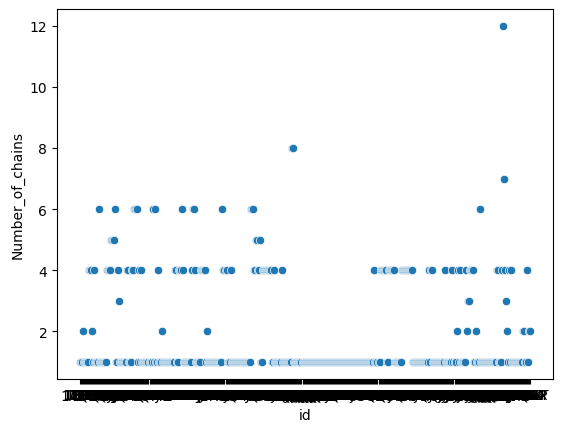

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
# from gapminder import gapminder # data set

# use the scatterplot function to build the bubble map
sns.scatterplot(data=pdb_df, x="id", y="Number_of_chains", legend=False, sizes=(20, 2000))

# show the graph
plt.show()

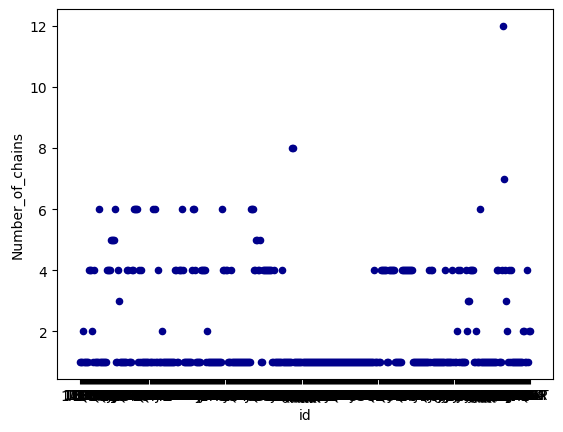

In [109]:
ax1 = pdb_df.plot.scatter(x='id',
                      y='Number_of_chains',
                      c='DarkBlue')